# Program to Classify CyberBullying Tweets and Non_CyberBullying Tweets using Natural Language Processing in Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_set = pd.read_csv('cyberbullying_tweets.csv')
data_set.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\navee\AppData\Local\Temp\ipykernel_18044\1974256737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cyberbullying_type', data=data_set, palette='pastel')


<Axes: xlabel='cyberbullying_type', ylabel='count'>

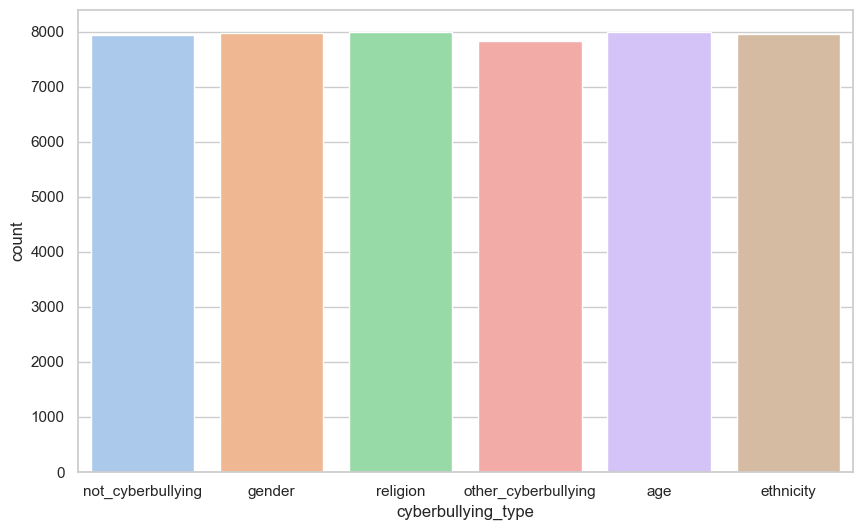

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='cyberbullying_type', data=data_set, palette='pastel')

In [5]:
data_set['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [6]:
null_set = data_set[data_set.isnull().any(axis=1)]
null_set

,tweet_text,cyberbullying_type


In [7]:
null_set.sum() # There are no null values

tweet_text            0
cyberbullying_type    0
dtype: object

In [8]:
# Keep first means, keep the first occurence of the value as a non-duplicate
# any further occurences are considered to be duplicates
duplicates = data_set.duplicated(keep='first')
duplicates.sum()

36

In [9]:
data_set.drop_duplicates(inplace=True) # Dropping duplicate values
data_set.duplicated(keep='first').sum()

0

# Text Pre-Processing

The below code is used to clean the data, by removing punctuations, url links (http and https), commonly used words, etc...)

In [10]:
import nltk
nltk.download_shell() # Download stopwords

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


        C:\Users\navee\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [23]:
# Cleaning the data_set

import re  # Regular Expression
import string
from nltk.corpus import stopwords

def clean_text(text) -> str:
    # Convert to lowercase
    text = text.lower()

    # Removing URLs, replacing all links with http and https with ""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters
    text_without_punctuations = [char for char in text if char not in string.punctuation] 

    # Join the list of characters back into a single string
    text = ''.join(text_without_punctuations)

    # Split the text into words
    words = text.split()

    # Removing stopwords
    words = [word for word in words if word.lower() not in stopwords.words('english')]

    return ' '.join(words)

In [24]:
data_set['tweet_text'] = data_set['tweet_text'].astype(str)
data_set['tweet_text'] = data_set['tweet_text'].apply(clean_text)

In [25]:
data_set.head()

,tweet_text,cyberbullying_type
0,words katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying
2,xochitlsuckkks classy whore red velvet cupcakes,not_cyberbullying
3,jasongio meh p thanks heads concerned another ...,not_cyberbullying
4,rudhoeenglish isis account pretending kurdish ...,not_cyberbullying


# Word Cloud

The below code is used to visualize the most frequently occuring words in the cyberbullying texts using Word Cloud

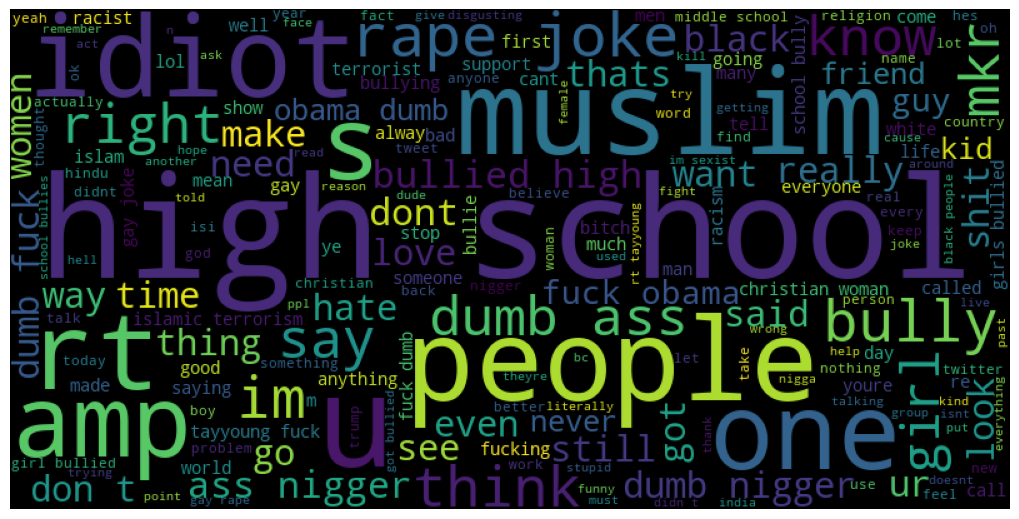

In [26]:
from wordcloud import WordCloud

all_words = ' '.join(word for word in data_set['tweet_text'])

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'black',
    min_font_size = 10).generate(all_words)
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off') 
plt.tight_layout(pad = 0) 

# Creating a Pipeline

The below code is used to create a PipeLine which creates,
1. A bag of words vector (To find the count),
2. Then it uses TFIDF Transformation to find the weight of each word,
3. Then creating a model using different Classification Algorithms.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB()),
])

# Training the Model

In [28]:
from sklearn.model_selection import train_test_split
X = data_set['tweet_text']
y = data_set['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
pipeline.fit(X_train, y_train)
predicted_y = pipeline.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predicted_y))
print("\n\n")
print(classification_report(y_test, predicted_y))

[[1873  110   50  110   20  230]
 [ 318 1405  126  173   51  307]
 [ 243  236 1191  261   64  432]
 [ 432  311  371  506  135  623]
 [ 387  310  358  320  294  672]
 [ 186   99  102  153   27 1811]]



                     precision    recall  f1-score   support

                age       0.54      0.78      0.64      2393
          ethnicity       0.57      0.59      0.58      2380
             gender       0.54      0.49      0.52      2427
  not_cyberbullying       0.33      0.21      0.26      2378
other_cyberbullying       0.50      0.13      0.20      2341
           religion       0.44      0.76      0.56      2378

           accuracy                           0.50     14297
          macro avg       0.49      0.49      0.46     14297
       weighted avg       0.49      0.50      0.46     14297



In [32]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()), 
    ('classifier', LogisticRegression()),
])

from sklearn.model_selection import train_test_split
X = data_set['tweet_text']
y = data_set['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pipeline.fit(X_train, y_train)
predicted_y = pipeline.predict(X_test)

print(confusion_matrix(y_test, predicted_y))
print("\n\n")
print(classification_report(y_test, predicted_y))

C:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[1979  125   59   34   56  140]
 [ 196 1679  174   64   76  191]
 [ 159  236 1350  212  212  258]
 [ 166  198  368  725  621  300]
 [ 157  194  342  431  994  223]
 [ 103   92  115   94   85 1889]]



                     precision    recall  f1-score   support

                age       0.72      0.83      0.77      2393
          ethnicity       0.67      0.71      0.68      2380
             gender       0.56      0.56      0.56      2427
  not_cyberbullying       0.46      0.30      0.37      2378
other_cyberbullying       0.49      0.42      0.45      2341
           religion       0.63      0.79      0.70      2378

           accuracy                           0.60     14297
          macro avg       0.59      0.60      0.59     14297
       weighted avg       0.59      0.60      0.59     14297



In [33]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()), 
    ('classifier', RandomForestClassifier()),
])

from sklearn.model_selection import train_test_split
X = data_set['tweet_text']
y = data_set['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pipeline.fit(X_train, y_train)
predicted_y = pipeline.predict(X_test)

print(confusion_matrix(y_test, predicted_y))
print("\n\n")
print(classification_report(y_test, predicted_y))

[[2053   89   38   43   33  137]
 [ 192 1770  101   56   66  195]
 [ 132  128 1451  267  245  204]
 [ 124   96  172  892  866  228]
 [ 129  115  177  838  921  161]
 [ 118   82   90  100   90 1898]]



                     precision    recall  f1-score   support

                age       0.75      0.86      0.80      2393
          ethnicity       0.78      0.74      0.76      2380
             gender       0.72      0.60      0.65      2427
  not_cyberbullying       0.41      0.38      0.39      2378
other_cyberbullying       0.41      0.39      0.40      2341
           religion       0.67      0.80      0.73      2378

           accuracy                           0.63     14297
          macro avg       0.62      0.63      0.62     14297
       weighted avg       0.62      0.63      0.62     14297

